In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# exp = ["TD3", "vanilla", "vanilla-scaled", "tsenv", "SB3mod", "LSTM"]
exp = ["vanilla", "vanilla-scaled", "tsenv", "SB3mod"]#, "LSTM"]
lab = ["A", "B", "C", "D"]#, "E"]#, "F"]

In [95]:
def compile_perf_results(ticker):
    perf_results = []
    for e in exp :
        #"C:\\Users\\aineg\\a_BSc_DSA\\FYP_WriteUp_Apr2023\\Results\\FinalResults\\"
        loc1 = ticker + "\\" + e + "\\performance\\v1.csv"
        loc2 = ticker + "\\" + e + "\\performance\\v2.csv"
        loc3 = ticker + "\\" + e + "\\performance\\v3.csv"
        
        x = pd.concat([pd.read_csv(loc1), pd.read_csv(loc2)["0"],pd.read_csv(loc3)["0"]], axis=1)
        x = x.rename(columns={"Unnamed: 0":"Metric", "0":"value"})
        x = x.set_index("Metric")
        
        mean_col = "mean_" + e
        std_col = "std_" + e
        x[mean_col] = x[["value"]].mean(axis=1)
        x[std_col] = x[["value"]].std(axis=1)
        x = x[[std_col]]#, std_col]]
        perf_results.append(x)
    
    return pd.concat(perf_results, axis=1)

In [96]:
compile_perf_results("halfV").loc["Cumulative returns"]#.loc[["mean_vanilla-scaled", "mean-tsenv", "mean_SB3mod"]]

std_vanilla           0.000000
std_vanilla-scaled    0.039214
std_tsenv             0.174087
std_SB3mod            0.008165
Name: Cumulative returns, dtype: float64

In [88]:
2974749.46 - 1000000

1974749.46

In [ ]:
1974749.46
1947647.33

In [94]:
np.mean([1.964133,  1.888541, 1.990268])

1.9476473333333333

In [345]:
compile_perf_results("TWTR")

,mean_vanilla,std_vanilla,mean_vanilla-scaled,std_vanilla-scaled,mean_tsenv,std_tsenv,mean_SB3mod,std_SB3mod
Metric,,,,,,,,
Annual return,0.025881,0.044827,0.093657,0.005777,0.084268,0.011304,0.093509,0.051062
Cumulative returns,0.053427,0.092539,0.194834,0.012535,0.170818,0.023751,0.191859,0.106970
Annual volatility,0.150821,0.261230,0.461579,0.005185,0.336548,0.225193,0.240842,0.201408
Sharpe ratio,0.398698,NaN,0.431755,0.010766,0.600424,0.302503,0.825441,0.523804
Calmar ratio,0.162810,NaN,0.197554,0.015034,0.547270,0.618180,0.774863,0.675021
Stability,0.000019,0.000032,0.006044,0.004800,0.207478,0.355368,0.359045,0.386854
Max drawdown,-0.158966,0.275336,-0.474443,0.007054,-0.335588,0.241168,-0.228267,0.193441
Omega ratio,1.093486,NaN,1.102358,0.002943,1.159822,0.101617,1.251363,0.221207
Sortino ratio,0.538220,NaN,0.587621,0.016043,0.849816,0.469606,1.292091,0.993051


In [449]:
list(round(compile_perf_results("M").loc["Max drawdown"], 3))[1::2]

[0.255, 0.115, 0.117, 0.104, 0.038, 0.001]

In [357]:
list(round(compile_perf_results("M").loc["Max drawdown"], 3))[1::2]

[0.115, 0.117, 0.104, 0.038]

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\2761385575.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)


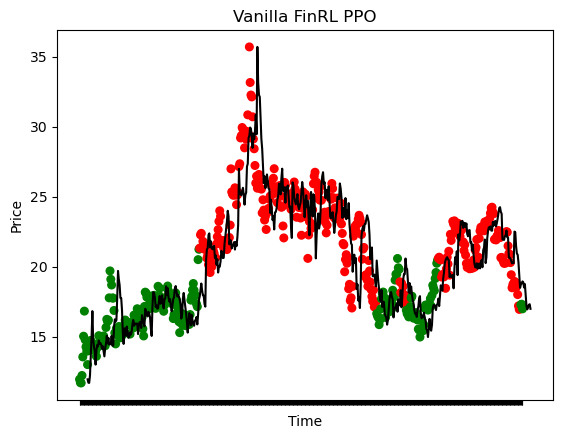

In [237]:
close_ts = pd.read_csv("M\\test.csv")["close"][10:]
raw_actions = pd.read_csv("M\\SB3mod\\raw_actions\\v1.csv")["raw_actions"]#[10:]
col_actions = []
for a in raw_actions:
    if a < 0:
        col_actions.append("red")
    elif a == 0:
        col_actions.append("black")
    else:
        col_actions.append("green")



# Create the figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(close_ts, color='black')

# Add the scatter markers
ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(close_ts)))
ax.set_xticklabels([])

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Vanilla FinRL PPO')

# Display the plot
plt.show()

In [311]:
x = pd.concat([pd.read_csv("IBM\\vanilla-scaled\\performance\\v1.csv"),
         pd.read_csv("IBM\\vanilla-scaled\\performance\\v2.csv")["0"],
          pd.read_csv("IBM\\vanilla-scaled\\performance\\v3.csv")["0"]], axis=1)
x = x.rename(columns={"Unnamed: 0":"Metric", "0":"value"})
x = x.set_index("Metric")
x["average1"] = x[["value"]].mean(axis=1)
x["std1"] = x[["value"]].std(axis=1)
x = x[["average1", "std1"]]


y = pd.concat([pd.read_csv("IBM\\vanilla-scaled\\performance\\v1.csv"),
         pd.read_csv("IBM\\vanilla-scaled\\performance\\v2.csv")["0"],
          pd.read_csv("IBM\\vanilla-scaled\\performance\\v2.csv")["0"]], axis=1)
y = y.rename(columns={"Unnamed: 0":"Metric", "0":"value"})
y = y.set_index("Metric")
y["average2"] = y[["value"]].mean(axis=1)
y["std2"] = y[["value"]].std(axis=1)
y = y[["average2", "std2"]]

pd.concat([x,y], axis=1)

,average1,std1,average2,std2
Metric,,,,
Annual return,0.015603,0.025878,0.030366,0.026175
Cumulative returns,0.035013,0.058134,0.068188,0.058784
Annual volatility,0.272143,0.054333,0.244335,0.058899
Sharpe ratio,0.209342,0.094128,0.264592,0.092477
Calmar ratio,0.077876,0.131740,0.153446,0.132573
Stability,0.142521,0.130305,0.217822,0.130184
Max drawdown,-0.316870,0.104032,-0.261760,0.110886
Omega ratio,1.042434,0.018706,1.053577,0.018047
Sortino ratio,0.282789,0.125738,0.356976,0.122784


In [299]:
(0.000142+0.04578+0.045478)/3

0.03046666666666667

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\2761385575.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)


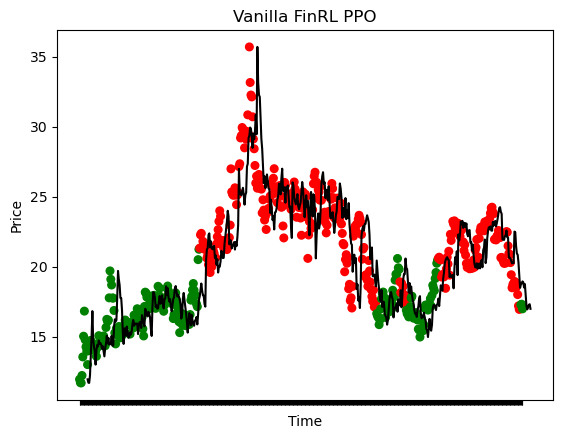

In [237]:
close_ts = pd.read_csv("M\\test.csv")["close"][10:]
raw_actions = pd.read_csv("M\\SB3mod\\raw_actions\\v1.csv")["raw_actions"]#[10:]
col_actions = []
for a in raw_actions:
    if a < 0:
        col_actions.append("red")
    elif a == 0:
        col_actions.append("black")
    else:
        col_actions.append("green")



# Create the figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(close_ts, color='black')

# Add the scatter markers
ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(close_ts)))
ax.set_xticklabels([])

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Vanilla FinRL PPO')

# Display the plot
plt.show()

In [42]:
def cash_bal_ts(ticker, e):
    acc_max = 0
    acc_min = 0

        #"C:\\Users\\aineg\\a_BSc_DSA\\FYP_WriteUp_Apr2023\\Results\\FinalResults\\"
    loc1 = ticker + "\\" + e + "\\account_memory\\v1.csv"
    loc2 = ticker + "\\" + e + "\\account_memory\\v2.csv"
    loc3 = ticker + "\\" + e + "\\account_memory\\v3.csv"
#         if e in ["TD3", "vanilla", "vanilla-scaled"]:

    n = len(pd.read_csv(loc1)["account_value"])
    acc_max = np.max([pd.read_csv(loc1)["account_value"][n-1], 
                         pd.read_csv(loc2)["account_value"][n-1], 
                         pd.read_csv(loc3)["account_value"][n-1]], axis=0)
    acc_min = np.min([pd.read_csv(loc1)["account_value"][n-1], 
             pd.read_csv(loc2)["account_value"][n-1], 
             pd.read_csv(loc3)["account_value"][n-1]], axis=0)
    
    print([pd.read_csv(loc1)["account_value"][n-1]-1000000, 
             pd.read_csv(loc2)["account_value"][n-1]-1000000, 
             pd.read_csv(loc3)["account_value"][n-1]-1000000])

#         elif e in ["tsenv", "SB3mod"]:
#             n = len(pd.read_csv(loc1)["account_value"])
#             acc_mems.append(np.mean([pd.read_csv(loc1)["account_value"][:n-5], 
#                      pd.read_csv(loc2)["account_value"][:n-5], 
#                      pd.read_csv(loc3)["account_value"][:n-5]], axis=0))
        
#         else:
#             acc_mems.append(np.mean([pd.read_csv(loc1)["account_value"], 
#                      pd.read_csv(loc2)["account_value"], 
#                      pd.read_csv(loc3)["account_value"]], axis=0)) 
            
    
    return acc_min - 1000000, acc_max - 1000000

In [ ]:
#[64825.806445415365, -7193.754752478795, 331.1561292952392]

In [44]:
#["TD3", "vanilla", "vanilla-scaled", "tsenv", "SB3mod", "LSTM"]
cash_bal_ts("M", "tsenv")

[21153.427917983616, -161793.53552852594, -143295.52791596903]


(-161793.53552852594, 21153.427917983616)

In [519]:
##Visualizations of change in cash balance for each model

def cash_bal_ts(ticker):
    acc_mems = []
    for e in exp :
        #"C:\\Users\\aineg\\a_BSc_DSA\\FYP_WriteUp_Apr2023\\Results\\FinalResults\\"
        loc1 = ticker + "\\" + e + "\\account_memory\\v1.csv"
        loc2 = ticker + "\\" + e + "\\account_memory\\v2.csv"
        loc3 = ticker + "\\" + e + "\\account_memory\\v3.csv"
        if e in ["TD3", "vanilla", "vanilla-scaled"]:
        
            n = len(pd.read_csv(loc1)["account_value"])
            acc_mems.append(np.mean([pd.read_csv(loc1)["account_value"][10:n-5], 
                                 pd.read_csv(loc2)["account_value"][10:n-5], 
                                 pd.read_csv(loc3)["account_value"][10:n-5]], axis=0))

        elif e in ["tsenv", "SB3mod"]:
            n = len(pd.read_csv(loc1)["account_value"])
            acc_mems.append(np.mean([pd.read_csv(loc1)["account_value"][:n-5], 
                     pd.read_csv(loc2)["account_value"][:n-5], 
                     pd.read_csv(loc3)["account_value"][:n-5]], axis=0))
        
        else:
            acc_mems.append(np.mean([pd.read_csv(loc1)["account_value"], 
                     pd.read_csv(loc2)["account_value"], 
                     pd.read_csv(loc3)["account_value"]], axis=0)) 
            
    
    return acc_mems
#     fig, ax = plt.subplots()
#     main = ticker + "Account Memory"
#     ax.set_title(main)
#     ax.set_xlabel("Time")
#     ax.set_ylabel("Account Balance $")
    
#     for i in range(len(acc_mems)):
#         ax.plot(acc_mems[i], label=exp[i])
#     plt.legend(loc="lower left")
    
#     return plt

In [523]:
[len(i) for i in cash_bal_ts("IBM")]

[536, 536, 536, 536, 536, 536]

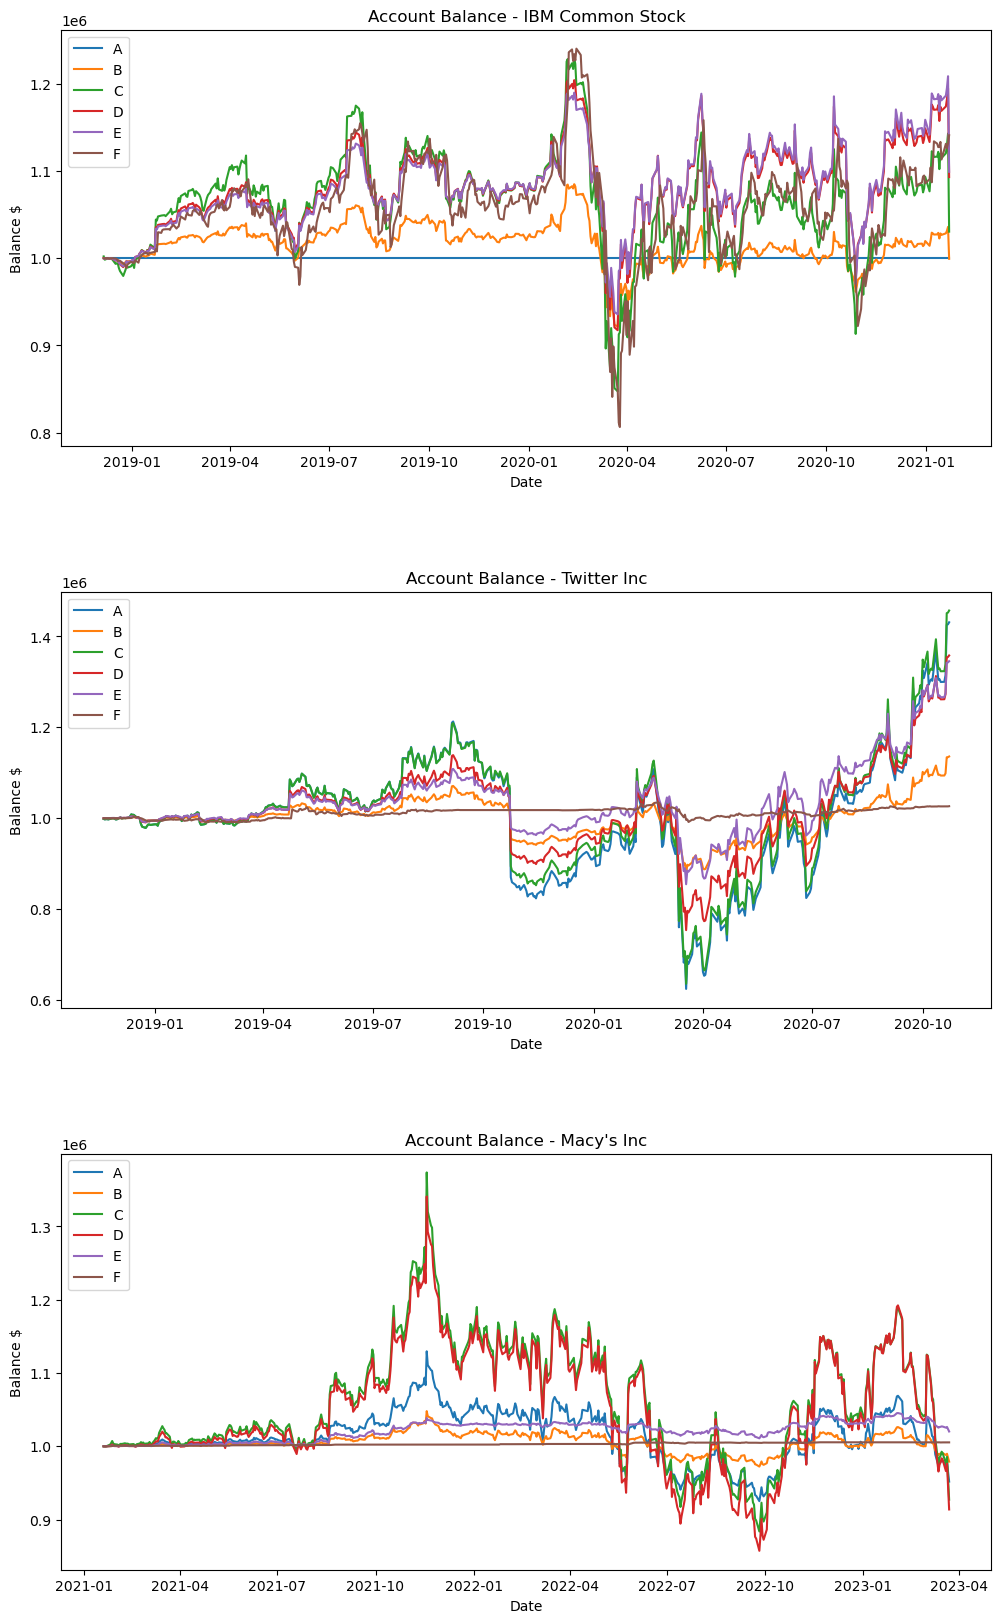

In [524]:
acc_mems = [cash_bal_ts("IBM"), cash_bal_ts("TWTR"), cash_bal_ts("M")]
tics = ["IBM Common Stock", "Twitter Inc", "Macy's Inc"]
dates = [IBM_test_close.index, TWTR_test_close.index, M_test_close.index]


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 20),
                          gridspec_kw={'hspace': 0.35})

for i in range(3):
    for j in range(6):
        ax[i].plot(dates[i][10:len(dates[i])-5], acc_mems[i][j], label=lab[j])
    main = "Account Balance - " + tics[i] 
    ax[i].set_title(main)
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Balance $")
    ax[i].legend(loc="upper left")



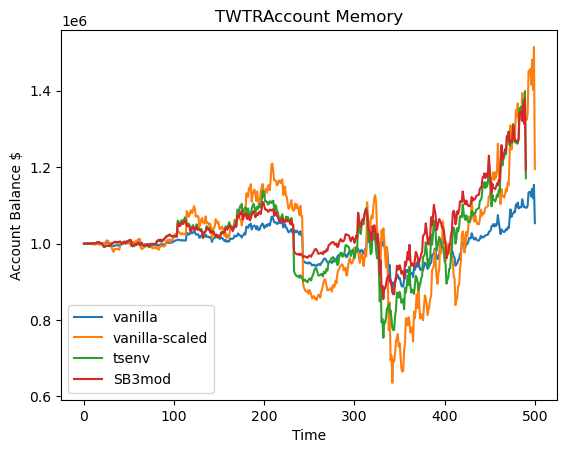

In [282]:
visualize_cash_bal("TWTR")

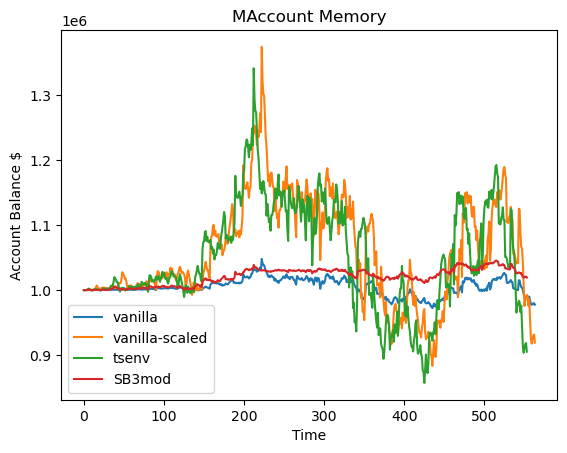

In [272]:
visualize_cash_bal("M")

In [4]:
def col_actions(raw_actions):
    cols = []
    for a in raw_actions:
        if a < 0:
            cols.append("red")
        elif a == 0:
            cols.append("black")
        else:
            cols.append("green")
    return cols

In [5]:
def plot_points(ticker, exp, saveloc, exp_label):
    
    ts = ticker + "\\test.csv"
    if exp in ["tsenv", "SB3mod"]:
        close_ts = pd.read_csv(ts)["close"][10:]
    else:
        close_ts = pd.read_csv(ts)["close"]

    a1 = ticker + "\\" + exp + "\\raw_actions\\v1.csv"
    a2 = ticker + "\\" + exp + "\\raw_actions\\v2.csv"
    a3 = ticker + "\\" + exp + "\\raw_actions\\v3.csv"
    
    a1 = col_actions(pd.read_csv(a1)["raw_actions"])
    a2 = col_actions(pd.read_csv(a2)["raw_actions"])
    a3 = col_actions(pd.read_csv(a3)["raw_actions"])
    
    actions = [a1, a2, a3]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    fig.subplots_adjust(top=0.75)
    exp_name = "Experiment " + exp_label
    fig.suptitle(exp_name, fontweight="bold", y=0.9)
    for i in range(3):
        ax[i].plot(np.arange(len(close_ts)), close_ts, color='black')
        ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)

        # Set the x-axis tick labels
        ax[i].set_xticks(np.arange(len(close_ts)))
        ax[i].set_xticklabels([])

        # Set the axis labels and title
        ax[i].set_xlabel('Time')
        
        if i == 0:
            ax[i].set_ylabel('Price $')
        main = "v" + str(i+1)
        ax[i].set_title(main)
#     plt.savefig(saveloc)    
    plt.show()
    


In [79]:
def plot_points_lstm(ticker, exp, saveloc):
    
    ts = ticker + "\\test.csv"
    n = len(pd.read_csv(ts)["close"])

    close_ts = pd.read_csv(ts)["close"][10:n-6]
    

    a1 = ticker + "\\" + exp + "\\raw_actions\\v1.csv"
    a2 = ticker + "\\" + exp + "\\raw_actions\\v2.csv"
    a3 = ticker + "\\" + exp + "\\raw_actions\\v3.csv"
    
    a1 = col_actions(pd.read_csv(a1)["raw_actions"])
    a2 = col_actions(pd.read_csv(a2)["raw_actions"])
    a3 = col_actions(pd.read_csv(a3)["raw_actions"])
    
    actions = [a1, a2, a3]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    fig.subplots_adjust(top=0.75)
    exp_name = "Experiment " + "E"
    fig.suptitle(exp_name, fontweight="bold", y=0.9)
    for i in range(3):
        ax[i].plot(np.arange(len(close_ts)), close_ts, color='black')
        ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)

        # Set the x-axis tick labels
        ax[i].set_xticks(np.arange(len(close_ts)))
        ax[i].set_xticklabels([])

        # Set the axis labels and title
        ax[i].set_xlabel('Time')
        
        if i == 0:
            ax[i].set_ylabel('Price $')
        main = "v" + str(i+1)
        ax[i].set_title(main)
    
    plt.savefig(saveloc)
    plt.show()
    


C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


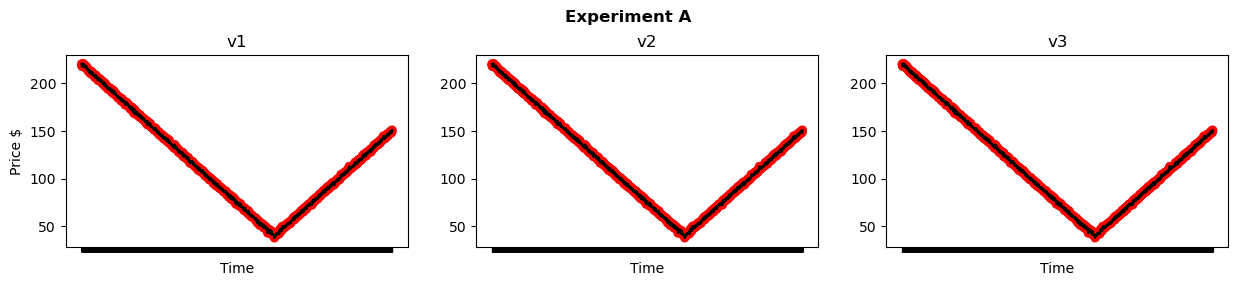

In [6]:
plot_points("halfV", "vanilla", "halfV\\vanilla\\actions.png", "A")

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


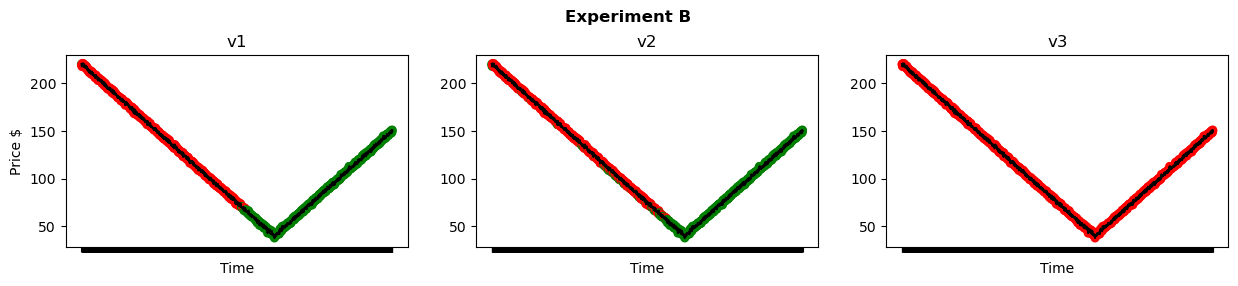

In [8]:
plot_points("halfV", "vanilla-scaled", "halfV\\vanilla-scaled\\actions.png", "B")

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


ValueError: 'c' argument has 1452 elements, which is inconsistent with 'x' and 'y' with size 1442.

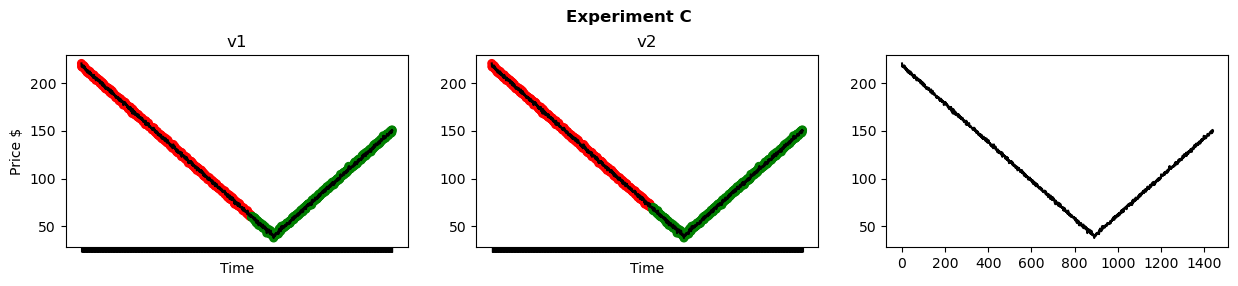

In [9]:
plot_points("halfV", "tsenv", "halfV\\tsenv\\actions.png", "C")

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


ValueError: 'c' argument has 1452 elements, which is inconsistent with 'x' and 'y' with size 1442.

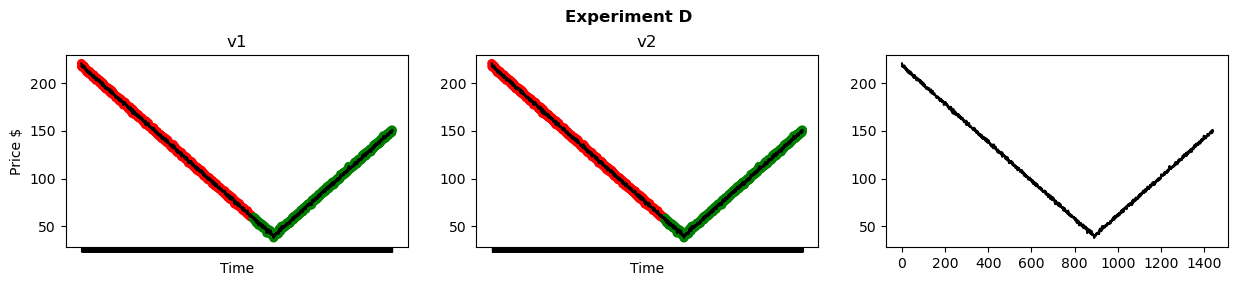

In [11]:
plot_points("halfV", "SB3mod", "halfV\\SB3mod\\actions.png", "D")

C:\Users\aineg\AppData\Local\Temp\ipykernel_19184\1759479956.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


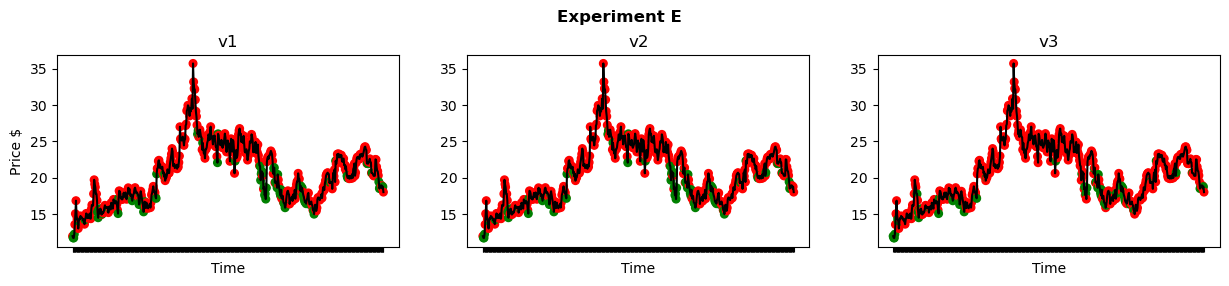

In [90]:
plot_points_lstm("M", "LSTM", "M\\LSTM\\actions.png")

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\4031227042.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


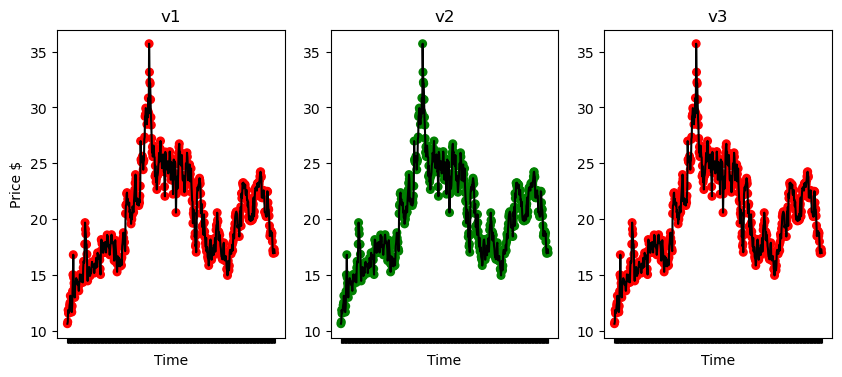

In [578]:
plot_points("M", "vanilla", "M\\vanilla\\actions.png")

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\4031227042.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


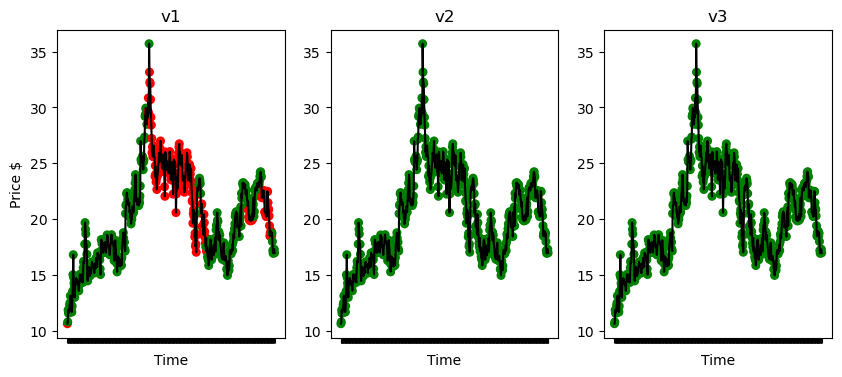

In [579]:
plot_points("M", "vanilla-scaled", "M\\vanilla-scaled\\actions.png")

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\4031227042.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


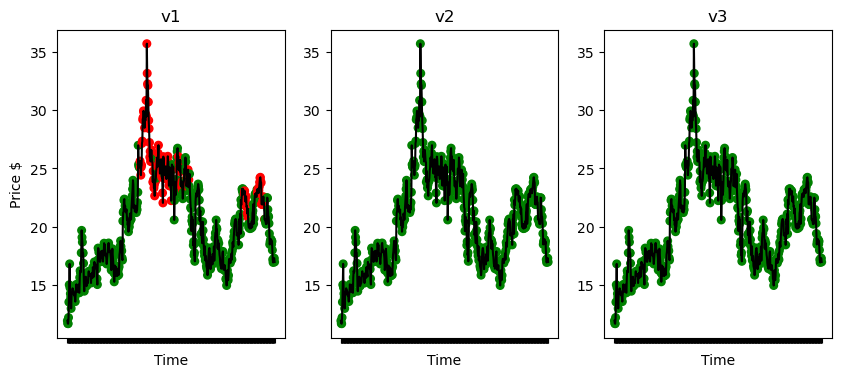

In [580]:
plot_points("M", "tsenv", "M\\tsenv\\actions.png")

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\4031227042.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


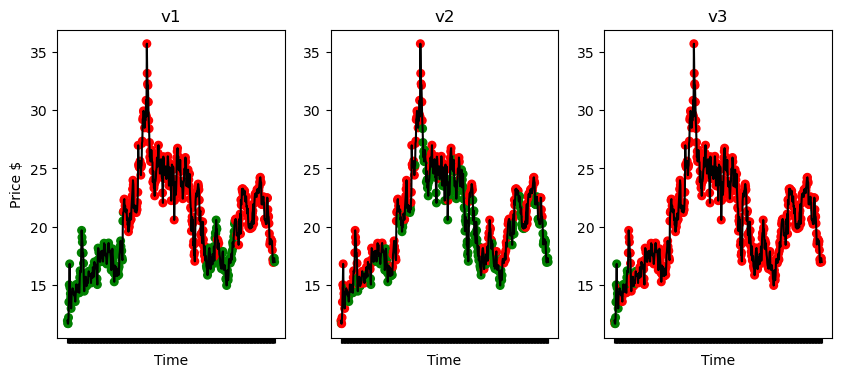

In [581]:
plot_points("M", "SB3mod", "M\\SB3mod\\actions.png")

C:\Users\aineg\AppData\Local\Temp\ipykernel_19184\1149024578.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


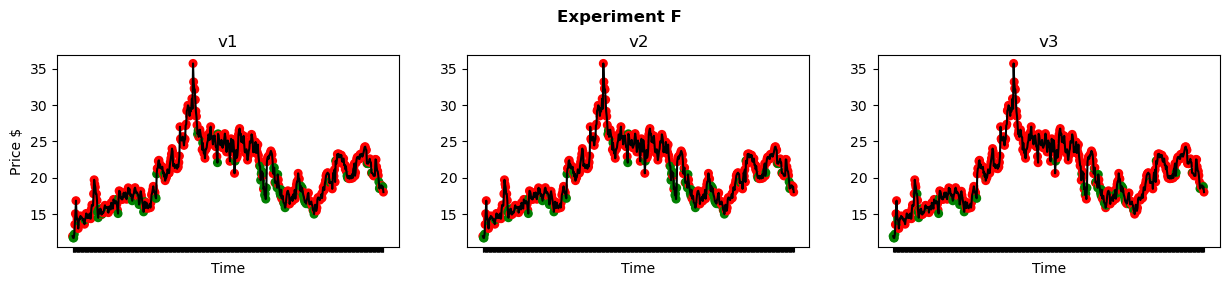

In [168]:
import yfinance as yf

In [366]:
IBM_train = pd.read_csv("IBM\\train.csv")
IBM_test = pd.read_csv("IBM\\test.csv")

IBM_train_close = IBM_train["close"]
IBM_train_close.index=pd.to_datetime(IBM_train["date"]).values
IBM_test_close = IBM_test["close"]
IBM_test_close.index=pd.to_datetime(IBM_test["date"])

TWTR_train = pd.read_csv("TWTR\\train.csv")
TWTR_test = pd.read_csv("TWTR\\test.csv")

TWTR_train_close = TWTR_train["close"]
TWTR_train_close.index=pd.to_datetime(TWTR_train["date"]).values
TWTR_test_close = TWTR_test["close"]
TWTR_test_close.index=pd.to_datetime(TWTR_test["date"]).values


M_train = pd.read_csv("M\\train.csv")
M_test = pd.read_csv("M\\test.csv")

M_train_close = M_train["close"]
M_train_close.index=pd.to_datetime(M_train["date"]).values
M_test_close = M_test["close"]
M_test_close.index=pd.to_datetime(M_test["date"]).values

In [174]:
IBM_train_start = IBM_train["date"][0]
IBM_train_end = IBM_train["date"][len(IBM_train)-1]
IBM_test_start = IBM_test["date"][0]
IBM_test_end = IBM_test["date"][len(IBM_test)-1]

TWTR_train_start = TWTR_train["date"][0]
TWTR_train_end = TWTR_train["date"][len(TWTR_train)-1]
TWTR_test_start = TWTR_test["date"][0]
TWTR_test_end = TWTR_test["date"][len(TWTR_test)-1]

KO_train_start = KO_train["date"][0]
KO_train_end = KO_train["date"][len(KO_train)-1]
KO_test_start = KO_test["date"][0]
KO_test_end = KO_test["date"][len(KO_test)-1]

In [597]:
#dat = pd.concat([pd.read_csv("IBM\\train.csv"), pd.read_csv("IBM\\test.csv")])
#print(len(pd.read_csv("IBM\\train.csv")["close"]))
# fig, ax = plt.subplots()
# ax.plot(IBM_train_close, 'blue', IBM_test_close, 'orange')
# ax.set_title('IBM Stock Closing Price')
# ax.set_xlabel("Time")
# ax.set_ylabel("Stock Price $")
# ax.legend(["Train","Test"])

def plot_train_test(train, test, ticker, corp_name):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6),
                          gridspec_kw={'hspace': 0.5})

    ax[0].plot(train, 'blue', test, 'orange')
    main = corp_name + " Stock Closing Price"
    ax[0].set_title(main)
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Stock Price $")
    ax[0].legend(["Train","Test"])
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Price $')



    ax[1].plot(test, 'orange')
    main = corp_name + " Stock Closing Price Test Data"
    ax[1].set_title(main)
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("Stock Price $")
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Price $')

    saveloc = ticker + "\\data.png"
    plt.savefig(saveloc)
    plt.show()

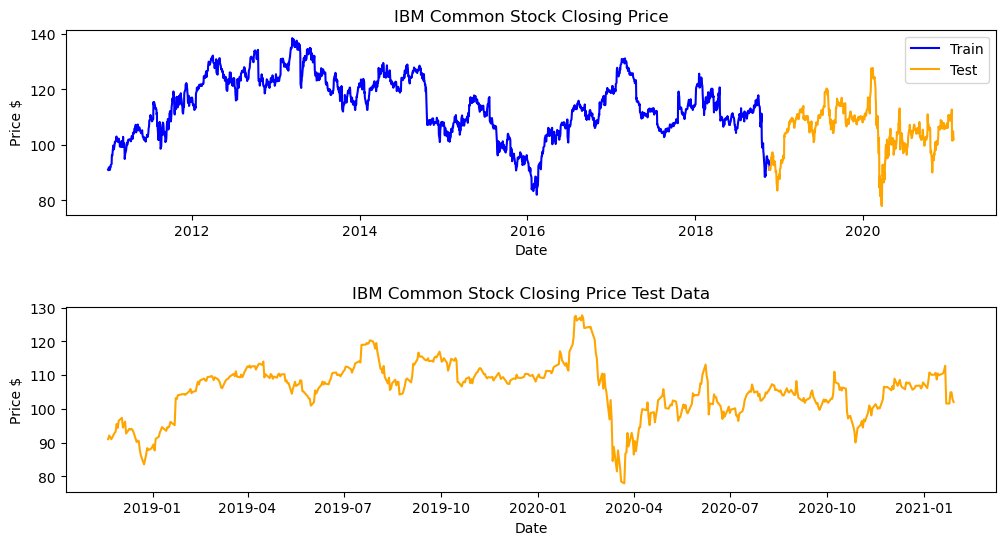

In [599]:
plot_train_test(IBM_train_close, IBM_test_close, "IBM", "IBM Common")

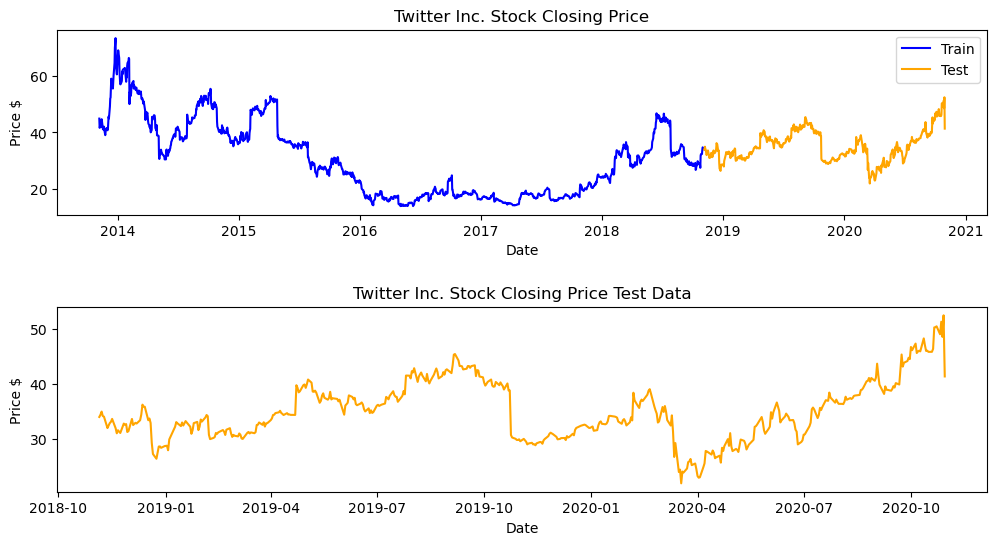

In [600]:
plot_train_test(TWTR_train_close, TWTR_test_close, "TWTR", "Twitter Inc.")

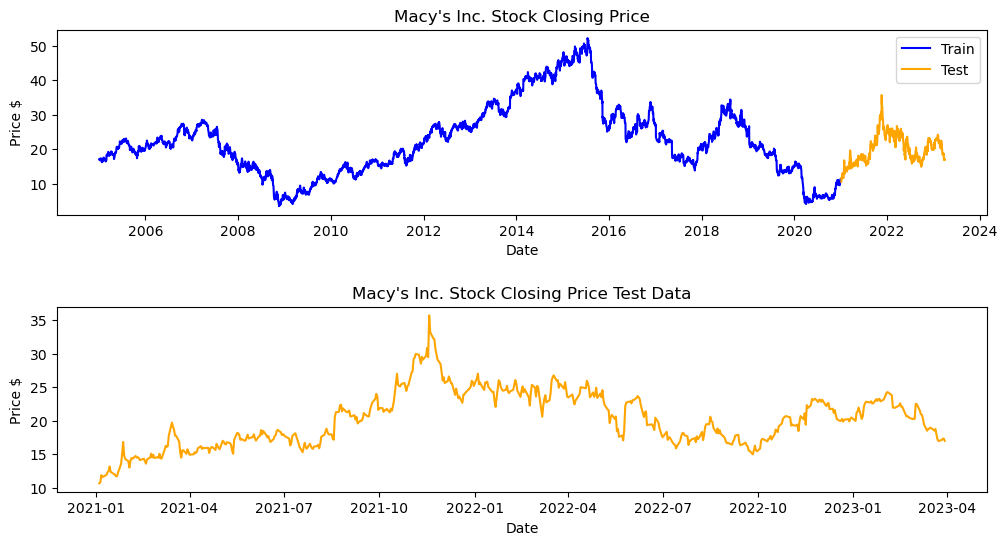

In [601]:
plot_train_test(M_train_close, M_test_close, "M", "Macy's Inc.")

### QQQ

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\3759801049.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)


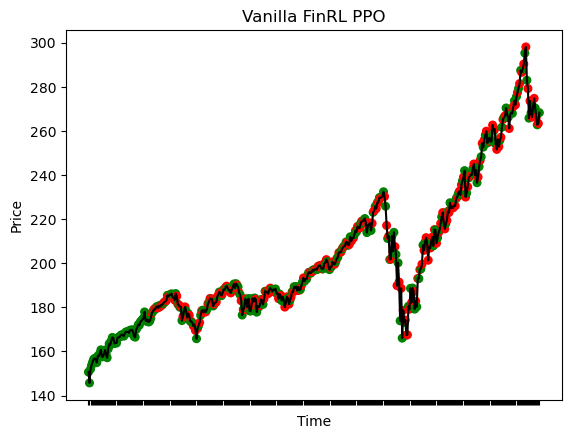

In [228]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration purposes
close_ts = pd.read_csv("QQQ\\test.csv")["close"]#[10:]
raw_actions = pd.read_csv("QQQ\\vanilla\\raw_actions\\v1.csv")["raw_actions"]#[10:]
col_actions = []
for a in raw_actions:
    if a < 0:
        col_actions.append("red")
    elif a == 0:
        col_actions.append("black")
    else:
        col_actions.append("green")



# Create the figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(close_ts, color='black')

# Add the scatter markers
ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(close_ts)))
ax.set_xticklabels([])

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Vanilla FinRL PPO')

# Display the plot
plt.show()


C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\1785170011.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)


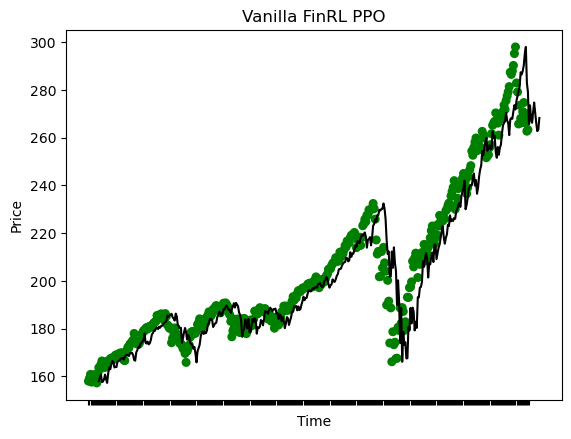

In [231]:
close_ts = pd.read_csv("QQQ\\test.csv")["close"][10:]
raw_actions = pd.read_csv("QQQ\\tsenv\\raw_actions\\v1.csv")["raw_actions"]#[10:]
col_actions = []
for a in raw_actions:
    if a < 0:
        col_actions.append("red")
    elif a == 0:
        col_actions.append("black")
    else:
        col_actions.append("green")



# Create the figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(close_ts, color='black')

# Add the scatter markers
ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(close_ts)))
ax.set_xticklabels([])

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Vanilla FinRL PPO')

# Display the plot
plt.show()


In [404]:
len(pd.read_csv("TWTR\\test.csv")["close"][10:495])

485

In [399]:
len(pd.read_csv("twtr_out.csv")["raw_actions"])

485

In [400]:
501 - 485

16

In [402]:
501 - 10 - 5

486

C:\Users\aineg\AppData\Local\Temp\ipykernel_9208\3450726669.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)


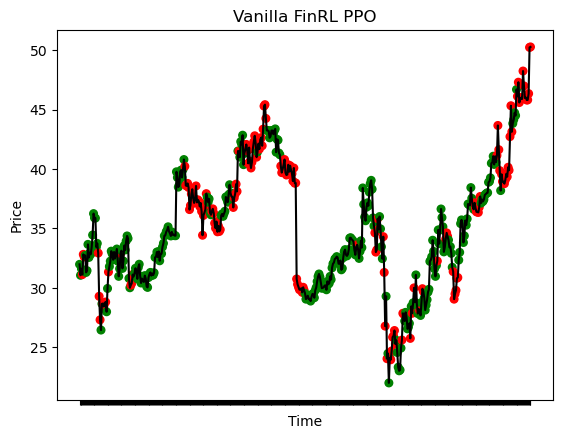

In [413]:
close_ts = pd.read_csv("TWTR\\test.csv")["close"][10:495]
raw_actions = pd.read_csv("twtr_actions.csv")["raw_actions"]#[10:]
col_actions = []
for a in raw_actions:
    if a < 0:
        col_actions.append("red")
    elif a == 0:
        col_actions.append("black")
    else:
        col_actions.append("green")



# Create the figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(np.arange(len(close_ts)), close_ts, color='black')

# Add the scatter markers
ax.scatter(np.arange(len(close_ts)), close_ts, c=col_actions, cmap='cool', s=30)

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(close_ts)))
ax.set_xticklabels([])

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Vanilla FinRL PPO')

# Display the plot
plt.show()


In [428]:
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt

# Load portfolio balance data
df = pd.read_csv('M\\LSTM\\account_memory\\v3.csv', index_col=0, parse_dates=True)["account_value"]

# Calculate portfolio returns
returns = df.pct_change().fillna(0)

# Calculate portfolio performance metrics
perf_stats = pf.timeseries.perf_stats(returns)
perf_stats.to_csv('M\\LSTM\\performance\\v3.csv')
# Generate performance report
# pf.create_full_tear_sheet(returns, benchmark_rets=None)

# # Plot portfolio returns
# plt.plot(df.index, df)
# plt.xlabel('Date')
# plt.ylabel('Portfolio Balance')
# plt.show()


C:\Users\aineg\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [450]:
acc_mems = [cash_bal_ts("IBM"), 
            cash_bal_ts("TWTR"), 
            cash_bal_ts("M")]

In [461]:
[bal[-1]-1000000.0 for bal in acc_mems[2]]

[-51606.69298381789,
 -22392.793368520215,
 -80738.81644700875,
 -94645.21184217045,
 19321.069274077192,
 5332.133197784424]

In [478]:
list(round(compile_perf_results("IBM").loc["Cumulative returns"], 5))[1::2]

[0.0, 0.00133, 0.05813, 0.0744, 0.08049, 0.00656]

In [496]:
v1 = []
v2 = []
v3 = []

In [499]:
#IBM

for e in exp:
    loc = "M" + "\\" + e + "\\account_memory\\v3.csv"
    v3.append(pd.read_csv(loc)["account_value"].values.tolist()[-1]-1000000)

In [500]:
for j in range(6):
    print(np.std([v[j] for v in [v1,v2,v3]]))

72982.88512693977
31668.19208117948
96992.28559032
82229.5072713561
32323.024814303084
1556.6704719565107


In [489]:
loc = "IBM" + "\\" + "vanilla-scaled" + "\\account_memory\\v3.csv"
pd.read_csv(loc)["account_value"].values.tolist()[-1]-1000000

2602.85363186663

309.82656479638536, 102127.44, 2602.85

In [490]:
np.std([309.82656479638536, 102127.44, 2602.85])

47466.0444444038

In [23]:
def plot_points_halfV():
    
    ticker = "halfV"
    ts = ticker + "\\test.csv"
    close_ts_other = pd.read_csv(ts)["close"][10:]

    close_ts_vanilla = pd.read_csv(ts)["close"]

    a_vanilla = ticker + "\\" + "vanilla" + "\\raw_actions\\v1.csv"
    a_other = ticker + "\\" + "tsenv" + "\\raw_actions\\v1.csv"
#     a2 = ticker + "\\" + exp + "\\raw_actions\\v2.csv"
#     a3 = ticker + "\\" + exp + "\\raw_actions\\v3.csv"
    
    a_vanilla = col_actions(pd.read_csv(a_vanilla)["raw_actions"])
    a_other = col_actions(pd.read_csv(a_other)["raw_actions"])
#     a2 = col_actions(pd.read_csv(a2)["raw_actions"])
#     a3 = col_actions(pd.read_csv(a3)["raw_actions"])
    
    actions = [a_vanilla, a_other]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    fig.subplots_adjust(top=0.75)
    #fig.suptitle(exp_name, fontweight="bold", y=0.9)

    ax[0].plot(np.arange(len(close_ts_vanilla)), close_ts_vanilla, color='black')
    ax[0].scatter(np.arange(len(close_ts_vanilla)), close_ts_vanilla, c=a_vanilla, cmap='cool', s=30)

    # Set the x-axis tick labels
    ax[0].set_xticks(np.arange(len(close_ts_vanilla)))
    ax[0].set_xticklabels([])

    # Set the axis labels and title
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Price $')
    ax[0].set_title("Experiment A")
    
    
    ax[1].plot(np.arange(len(close_ts_other)), close_ts_other, color='black')
    ax[1].scatter(np.arange(len(close_ts_other)), close_ts_other, c=a_other, cmap='cool', s=30)

    # Set the x-axis tick labels
    ax[1].set_xticks(np.arange(len(close_ts_other)))
    ax[1].set_xticklabels([])

    # Set the axis labels and title
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Price $')
    ax[1].set_title("Experiments B-E")


#     if i == 0:
#         ax[i].set_ylabel('Price $')
#         main = "v" + str(i+1)
#         ax[i].set_title(main)
    plt.savefig("halfV\\halfV-actions.png")    
    plt.show()
    

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\3177363214.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(np.arange(len(close_ts_vanilla)), close_ts_vanilla, c=a_vanilla, cmap='cool', s=30)
C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\3177363214.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(np.arange(len(close_ts_other)), close_ts_other, c=a_other, cmap='cool', s=30)


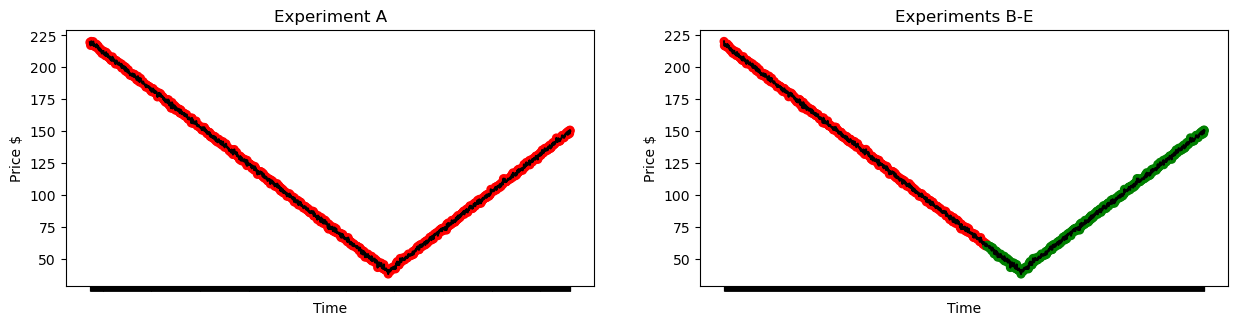

In [24]:
plot_points_halfV()

In [38]:
def plot_halfV(train, test, ticker, corp_name):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6),
                          gridspec_kw={'hspace': 0.5})

    ax.plot(train, 'blue')#, test, 'orange')
    main = "Simulated Data"
    ax.set_title(main)
#     ax.set_xlabel("Time")
    ax.set_ylabel("Stock Price $")
    #ax[0].legend(["Train","Test"])
#     ax.set_xlabel('Date')
    ax.set_ylabel('Price $')
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)



#     ax[1].plot(test, 'orange')
#     main = corp_name + " Stock Closing Price Test Data"
#     ax[1].set_title(main)
#     ax[1].set_xlabel("Time")
#     ax[1].set_ylabel("Stock Price $")
#     ax[1].set_xlabel('Date')
#     ax[1].set_ylabel('Price $')

#     saveloc = ticker + "\\data.png"
    plt.savefig("halfV\\data.png")
    plt.show()

In [36]:
halfV_data = pd.read_csv("halfV\\test.csv")["close"]
# TWTR_test = pd.read_csv("TWTR\\test.csv")

# TWTR_train_close = TWTR_train["close"]

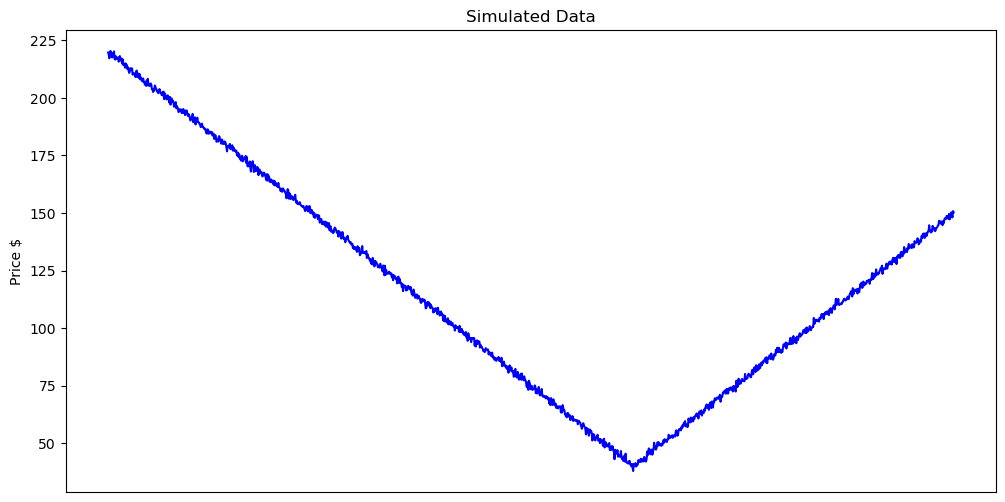

In [39]:
plot_halfV(halfV_data, halfV_data, "halfV", "Simulated Data")